# Titanic Survival Prediction


Import The Libaries


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score , classification_report
from sklearn.metrics import confusion_matrix

Load The Dataset

In [ ]:
titanic_data=pd.read_csv("/content/tested.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data Analysis

In [ ]:
titanic_data.shape

(418, 12)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Managing The Missing Values

In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
titanic_data=titanic_data.drop(["Cabin"],axis=1)

In [ ]:
titanic_data["Age"]=titanic_data["Age"].fillna(titanic_data["Age"].mean())

In [ ]:
titanic_data["Fare"]=titanic_data["Fare"].fillna(titanic_data["Fare"].mean())

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Exploratory Data Analysis

In [ ]:
titanic_data["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

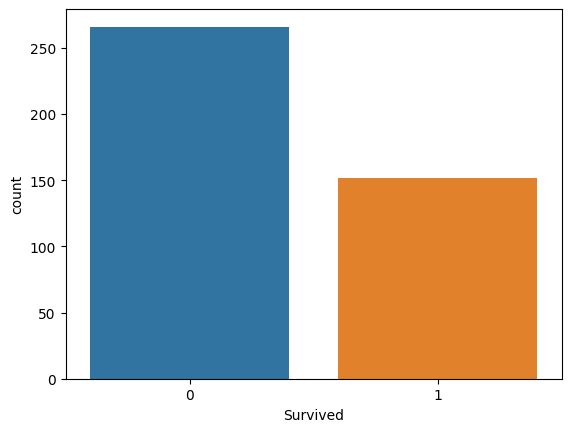

In [ ]:
sns.countplot(x='Survived',data=titanic_data)
plt.show()

In [ ]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

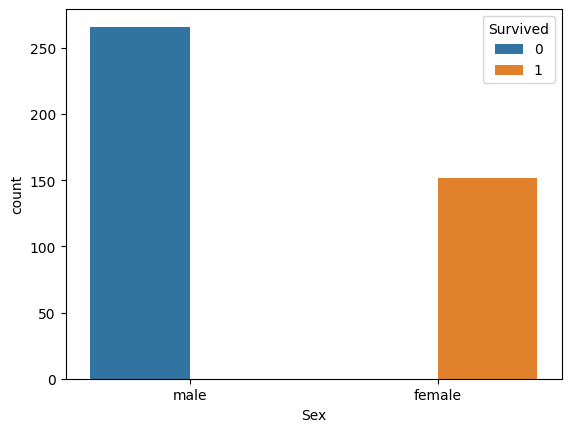

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=titanic_data)
plt.show()

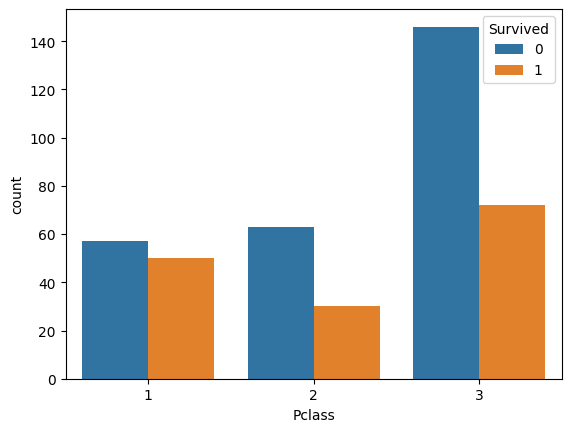

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)
plt.show()

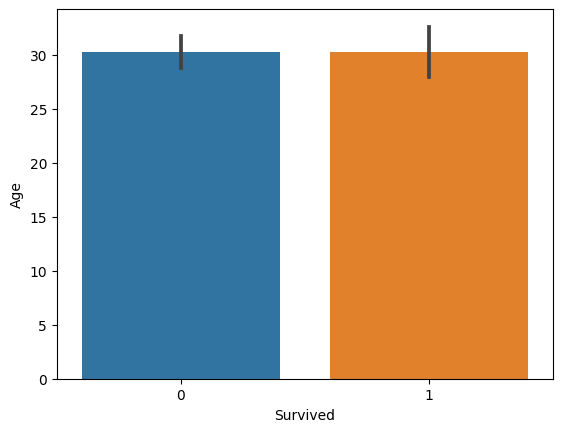

In [ ]:
sns.barplot(x='Survived',y='Age',data=titanic_data)
plt.show()

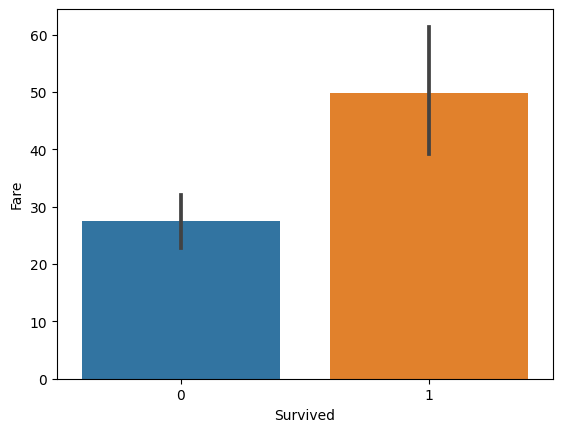

In [ ]:
sns.barplot(x='Survived',y='Fare',data=titanic_data)
plt.show()

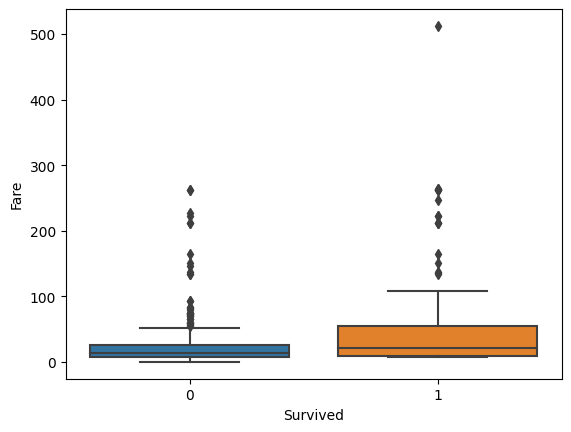

In [ ]:
sns.boxplot(x='Survived',y='Fare',data=titanic_data)
plt.show()

Data Preprocessing

In [ ]:
titanic_data["Sex"]=titanic_data["Sex"].replace({"male":0,"female":1})

In [ ]:
titanic_data["Embarked"]=titanic_data["Embarked"].replace({"S":0,"C":1,"Q":2})

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


Dividing The Dataset into The Independent And Dependent Variable

In [ ]:
x=titanic_data.drop(["Survived","PassengerId","Name","Ticket"],axis=1)
y=titanic_data["Survived"]

Split into a Train data and Test Data

In [ ]:
X_train , X_test , y_train ,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

Applying Logistic Regression

In [ ]:
model=LogisticRegression(solver="lbfgs",max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
model.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [ ]:
model.score(X_test,y_test)

1.0

Confusion Matrix

In [ ]:
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[50,  0],
       [ 0, 34]])

Visualization of Confusion Matrix

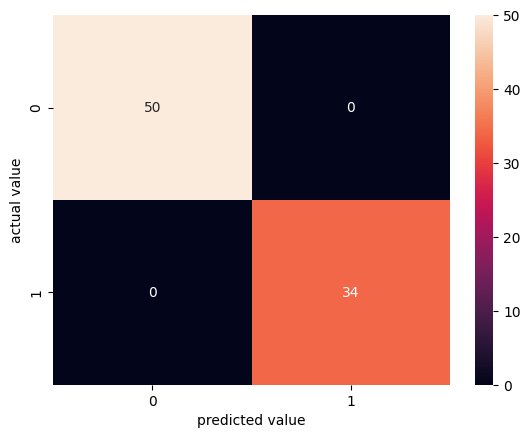

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel("predicted value")
plt.ylabel("actual value")
plt.show()

Check The Accuracy, Recall, Precision and F1-score

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

